In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# README

This notebook extracts some data from resp fitting. Namely it creates a CSV file with

- zinc code
- halogen charge
- sigma-hole charge (if applicable)
- standard error of the fitting
- dipole moment

## standard RESP

In [4]:
def parsePunch(mol):
    
    # initialize
    q_x = None
    stderr = None
    dipole = None
    
    # read file content
    punch = mol + "/antechamber/punch"
    with open(punch) as stream:
        lines = stream.readlines()
    
    # browse file content
    reading = False
    for line in lines:
        
        l_spl = line.split()
        
        # skip short
        if len(l_spl) == 0:
            continue
        
        # mark the start of reading
        if l_spl[0] == "NO":
            reading = True
            continue
        
        # skip if not 
        if not reading:
            continue
        
        # charges
        if len(l_spl) == 6:
            
            at_num = int(l_spl[1])
            
            # halogen
            if at_num in [17, 35, 53]:
                q_x = float(l_spl[3])
                continue

        
        # fit
        if l_spl[1] == "std":
            stderr = float(l_spl[-1])
        
        # dipole
        if l_spl[0] == "Dipole":
            dipole = float(l_spl[-1])
        
    return q_x, stderr, dipole


for halogen in "chlorine bromine iodine".split():

    mols = sorted(glob.glob(f"../{halogen}/ZINC*"))
    with open(f"../{halogen}/punches.csv", "w") as out:
        out.write("mol,q_x,stderr,dipole\n")
        for mol in mols:

            zinc = mol.split("/")[-1]
            q_x, stderr, dipole = parsePunch(mol)

            out.write(f"{zinc},{q_x:.6f},{stderr:.5f},{dipole:.5f}\n")
        
"done"

'done'

## Modified RESP

In [5]:
def parsePunch(mol):
    
    # initialize
    q_sigma = None
    q_x = None
    stderr = None
    dipole = None
    
    # read file content
    punch = mol + "/mod2/punch"
    with open(punch) as stream:
        lines = stream.readlines()
    
    # browse file content
    reading = False
    for line in lines:
        
        l_spl = line.split()
        
        # skip short
        if len(l_spl) == 0:
            continue
        
        # mark the start of reading
        if l_spl[0] == "NO":
            reading = True
            continue
        
        # skip if not 
        if not reading:
            continue
        
        # charges
        if len(l_spl) == 6:
            
            at_num = int(l_spl[1])
            
            # halogen
            if at_num in [17, 35, 53]:
                q_x = float(l_spl[3])
                continue
            
            # sigma
            if at_num == 0:
                q_sigma = float(l_spl[3])
                continue
        
        # fit
        if l_spl[1] == "std":
            stderr = float(l_spl[-1])
        
        # dipole
        if l_spl[0] == "Dipole":
            dipole = float(l_spl[-1])
        
    return q_sigma, q_x, stderr, dipole


for halogen in "chlorine bromine iodine".split():

    mols = sorted(glob.glob(f"../{halogen}/ZINC*"))
    with open(f"../{halogen}/punches-mod.csv", "w") as out:
        out.write("mol,q_sigma,q_x,stderr,dipole\n")
        for mol in mols:

            zinc = mol.split("/")[-1]
            q_sigma, q_x, stderr, dipole = parsePunch(mol)

            out.write(f"{zinc},{q_sigma:.6f},{q_x:.6f},{stderr:.5f},{dipole:.5f}\n")
        
"done"

'done'

In [6]:
df = pd.read_csv("../bromine/punches-mod.csv")
df

,mol,q_sigma,q_x,stderr,dipole
0,ZINC00000116,0.124869,-0.386344,0.00095,4.60699
1,ZINC00000900,0.080798,-0.196754,0.00120,5.66740
2,ZINC00001049,0.114473,-0.343004,0.00171,7.02851
3,ZINC00001059,0.095321,-0.288562,0.00088,2.56237
4,ZINC00001093,0.117763,-0.452420,0.00138,4.13247
...,...,...,...,...,...
1115,ZINC00180798,0.122195,-0.334719,0.00136,3.96918
1116,ZINC00182296,0.116323,-0.340364,0.00165,2.43237
1117,ZINC00182358,0.125876,-0.310303,0.00106,3.22232
1118,ZINC00182360,0.128643,-0.265401,0.00159,4.11702


In [7]:
df.mean()

q_sigma    0.113554
q_x       -0.304917
stderr     0.001346
dipole     4.010682
dtype: float64

In [8]:
df.std()

q_sigma    0.018130
q_x        0.046919
stderr     0.000354
dipole     1.894459
dtype: float64

In [9]:
sigmas = df.sort_values(by="q_sigma")["q_sigma"]

<BarContainer object of 1120 artists>

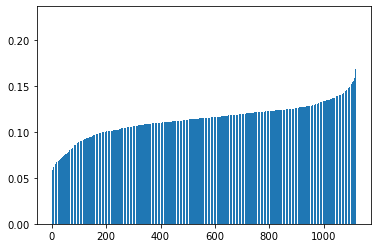

In [10]:
plt.bar(np.arange(len(sigmas)), sigmas)

In [11]:
df.sort_values(by="q_sigma")

,mol,q_sigma,q_x,stderr,dipole
865,ZINC00158941,0.041548,-0.224430,0.00167,3.75089
838,ZINC00158677,0.045729,-0.208076,0.00197,4.03573
867,ZINC00158960,0.058790,-0.262395,0.00133,2.74247
1020,ZINC00167040,0.059130,-0.258754,0.00122,3.44646
1035,ZINC00168343,0.060491,-0.251185,0.00166,3.38708
...,...,...,...,...,...
1106,ZINC00178230,0.160937,-0.337167,0.00172,3.10228
1013,ZINC00166552,0.166286,-0.436370,0.00097,2.06629
815,ZINC00158586,0.168607,-0.479088,0.00096,3.86232
916,ZINC00161343,0.168617,-0.312596,0.00115,6.58358
